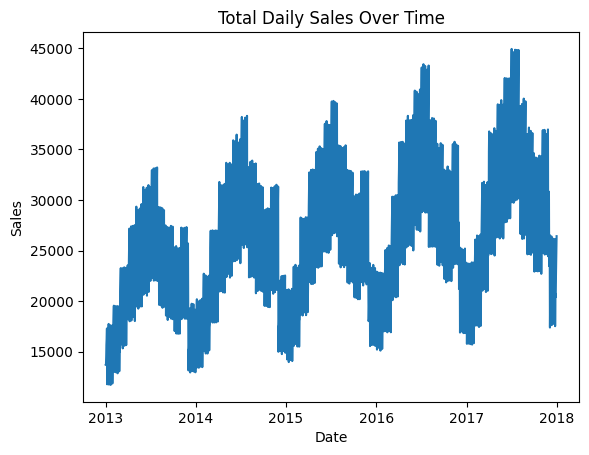

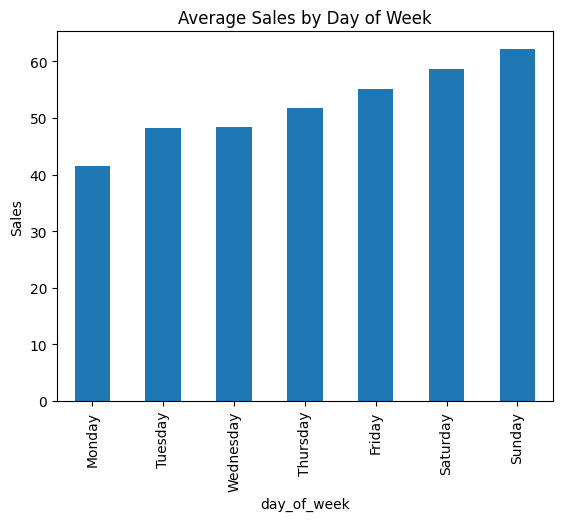

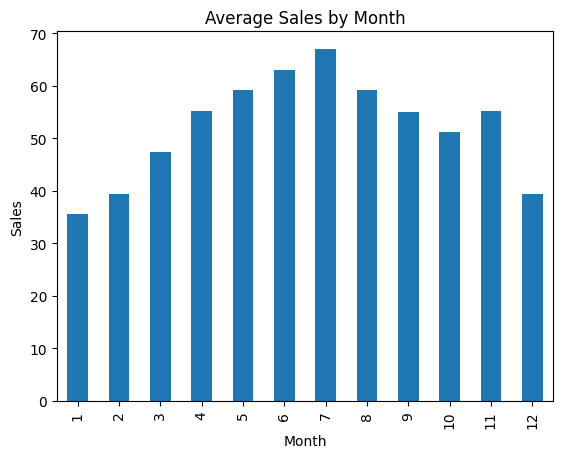

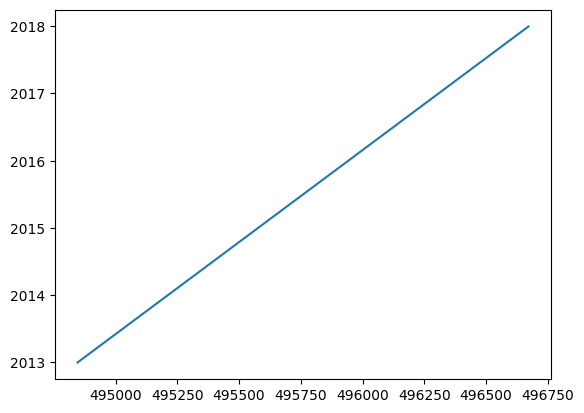

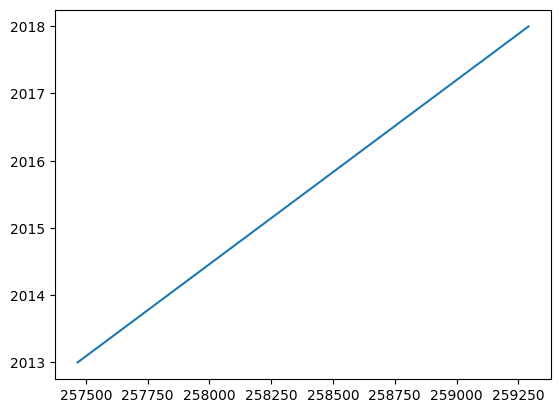

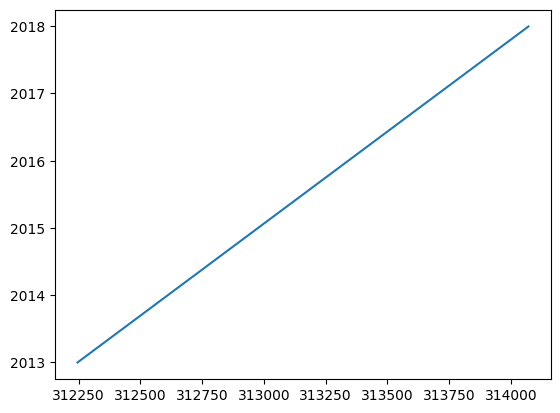

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
train = pd.read_csv("train.csv")
train["date"] = pd.to_datetime(train["date"])

# -------------------------
# DAILY TOTAL SALES TREND
# -------------------------
daily_sales = train.groupby("date")["sales"].sum()

plt.figure()
plt.plot(daily_sales)
plt.title("Total Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

# -------------------------
# WEEKLY SEASONALITY
# -------------------------
train["day_of_week"] = train["date"].dt.day_name()

weekly = (
    train.groupby("day_of_week")["sales"]
    .mean()
    .reindex([
        "Monday", "Tuesday", "Wednesday",
        "Thursday", "Friday", "Saturday", "Sunday"
    ])
)

plt.figure()
weekly.plot(kind="bar")
plt.title("Average Sales by Day of Week")
plt.ylabel("Sales")
plt.show()

# -------------------------
# MONTHLY SEASONALITY
# -------------------------
train["month"] = train["date"].dt.month

monthly = train.groupby("month")["sales"].mean()

plt.figure()
monthly.plot(kind="bar")
plt.title("Average Sales by Month")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

# -------------------------
# SAMPLE PRODUCT TIME SERIES
# -------------------------
sample_products = (
    train.groupby(["store", "item"])["sales"]
    .sum()
    .sort_values(ascending=False)
    .head(3)
    .index
)

for store, item in sample_products:
    subset = train[(train["store"] == store) & (train["item"] == item)]

    plt.figure()
    plt.plot(subset["date"])



